In [2]:
# Based on https://www.kaggle.com/l0new0lf/vehicle-classification
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
import cv2
from PIL import Image
import keras
# For one-hot-encoding
from keras.utils import np_utils
# For creating sequenttial model
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
# For saving and loading models
from keras.models import load_model


import random

In [3]:
classes = os.listdir('C://Users//jaherran//Projects//Python//BusClassifier//vehicle//train//train')
BASE = 'C://Users//jaherran//Projects//Python//BusClassifier//vehicle//train//train//'

# create dict of list of images per class
dataset = {}
for vehicle in classes:
    dataset[vehicle] = [i for i in os.listdir(BASE + vehicle)]

In [4]:
# verify
print(dataset.keys())
print(len(dataset.keys()))

dict_keys(['Ambulance', 'Barge', 'Bicycle', 'Boat', 'Bus', 'Car', 'Cart', 'Caterpillar', 'Helicopter', 'Limousine', 'Motorcycle', 'Segway', 'Snowmobile', 'Tank', 'Taxi', 'Truck', 'Van'])
17


In [5]:
# convert dict to pandas df
df = pd.DataFrame.from_dict(dataset, orient='index')
df = df.transpose()

In [6]:
df.head()

Ambulance          Barge        Bicycle           Boat            Bus  \
0  000040_09.jpg  000002_07.jpg  000001_00.jpg  000002_14.jpg  000001_02.jpg   
1  000050_10.jpg  000022_07.jpg  000001_19.jpg  000003_04.jpg  000002_04.jpg   
2  000052_03.jpg  000027_06.jpg  000004_07.jpg  000003_09.jpg  000003_02.jpg   
3  000057_04.jpg  000027_11.jpg  000004_15.jpg  000004_03.jpg  000003_06.jpg   
4  000067_14.jpg  000027_12.jpg  000010_09.jpg  000004_11.jpg  000007_09.jpg   

             Car           Cart    Caterpillar     Helicopter      Limousine  \
0  000001_08.jpg  000025_00.jpg  000035_05.jpg  000009_16.jpg  000118_07.jpg   
1  000001_11.jpg  000080_00.jpg  000046_04.jpg  000010_12.jpg  000132_17.jpg   
2  000001_16.jpg  000112_05.jpg  000058_02.jpg  000021_16.jpg  000175_16.jpg   
3  000001_18.jpg  000129_03.jpg  000060_07.jpg  000025_11.jpg  000324_09.jpg   
4  000002_13.jpg  000170_01.jpg  000067_10.jpg  000030_17.jpg  000324_18.jpg   

      Motorcycle         Segway     Snowmobile           Tank           Taxi  \
0  000001_15.jpg  000076_06.jpg  000065_07.jpg  000040_06.jpg  000001_14.jpg   
1  000002_06.jpg  000163_15.jpg  000104_05.jpg  000041_00.jpg  000003_08.jpg   
2  000003_15.jpg  000167_12.jpg  000119_11.jpg  000043_00.jpg  000005_06.jpg   
3  000003_16.jpg  000204_10.jpg  000179_14.jpg  000064_07.jpg  000006_17.jpg   
4  000004_00.jpg  000225_11.jpg  000207_14.jpg  000074_12.jpg  000009_12.jpg   

           Truck            Van  
0  000001_04.jpg  000003_13.jpg  
1  000002_03.jpg  000005_05.jpg  
2  000003_05.jpg  000006_16.jpg  
3  000005_10.jpg  000006_18.jpg  
4  000006_12.jpg  000009_11.jpg

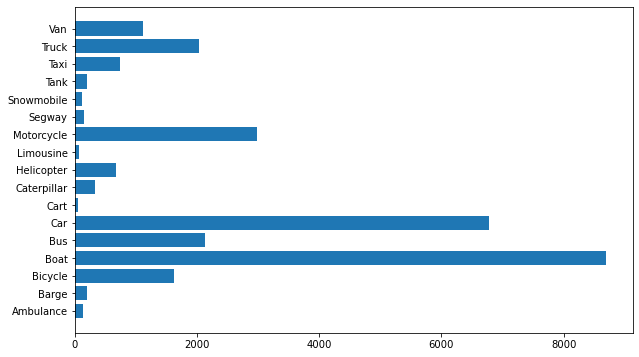

In [7]:
cols = []
col_imgs = []
for col in df.columns:
    cols.append(col)
    col_imgs.append(df[col].count())

plt.figure(figsize=(10,6))
plt.barh(cols, col_imgs)
plt.show()

Displaying 4 ranndom image per vehicle class


<Figure size 432x288 with 0 Axes>

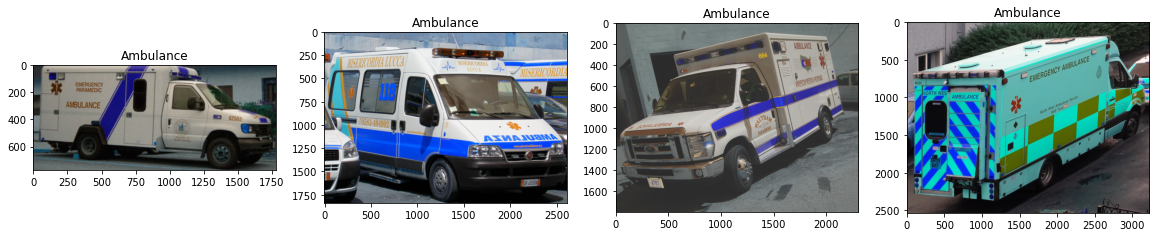

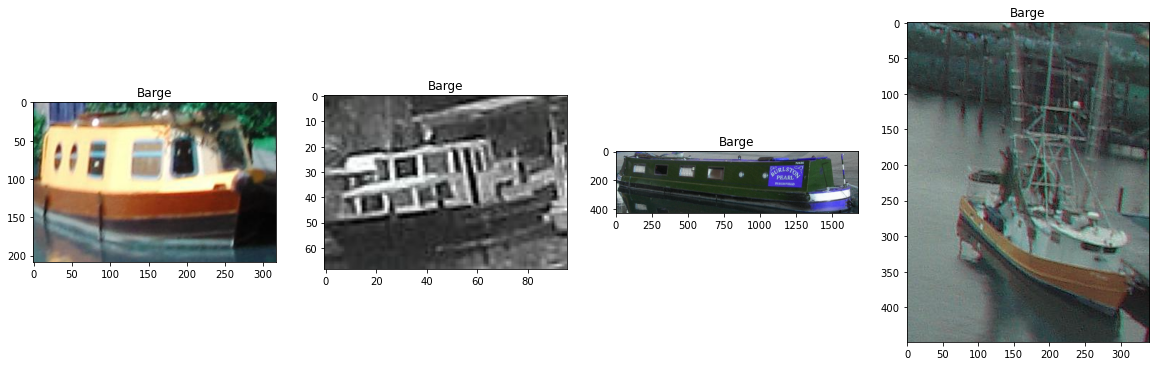

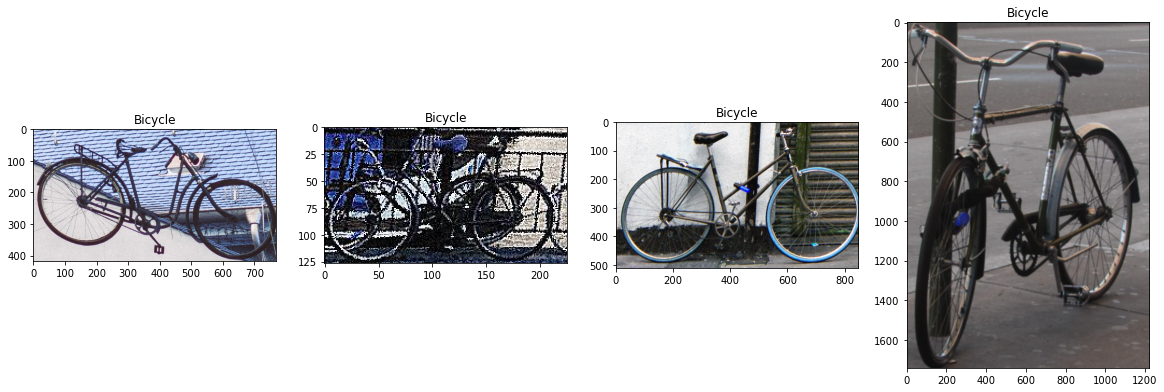

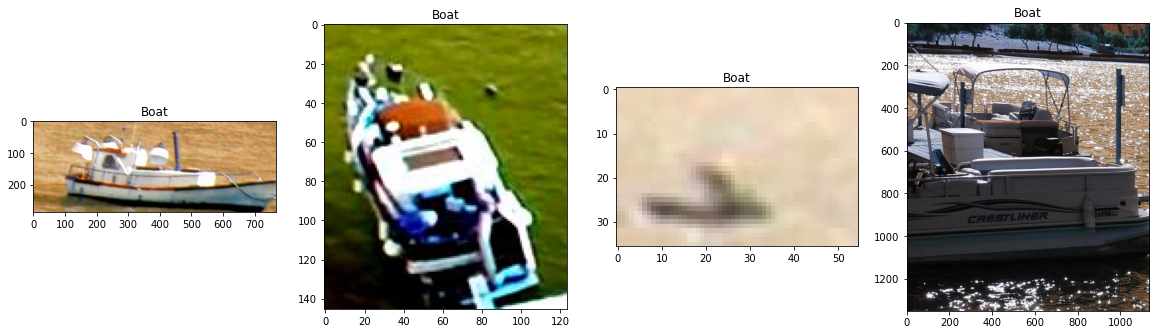

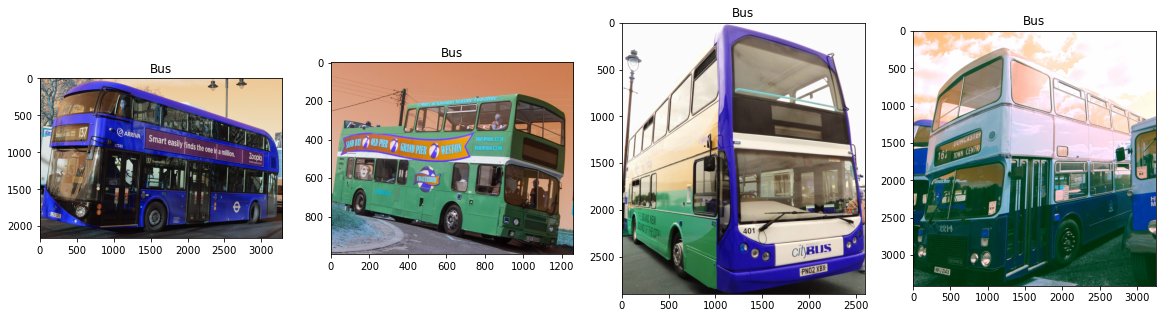

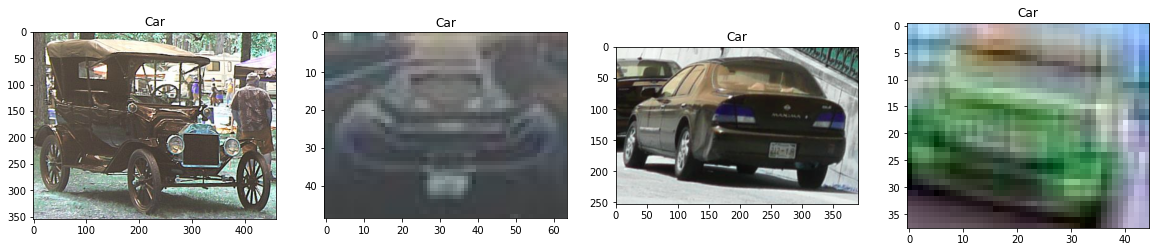

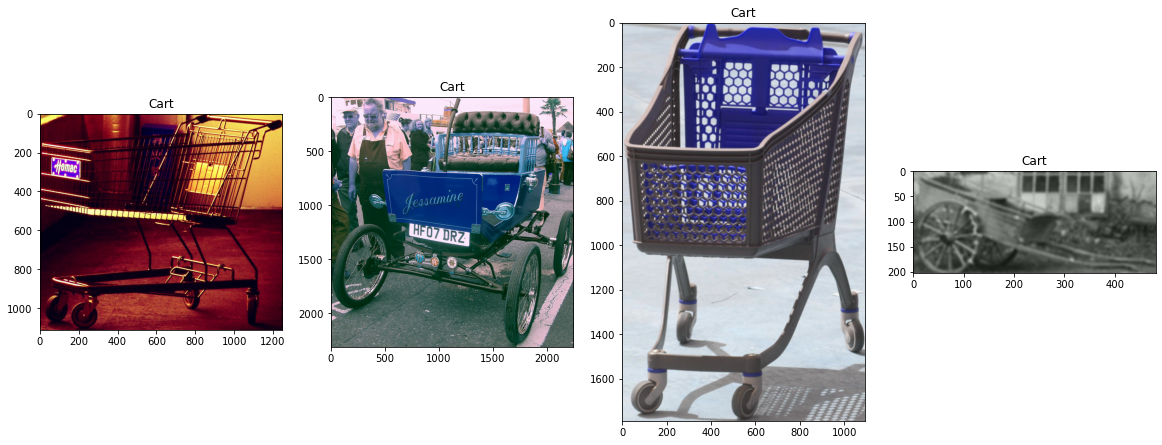

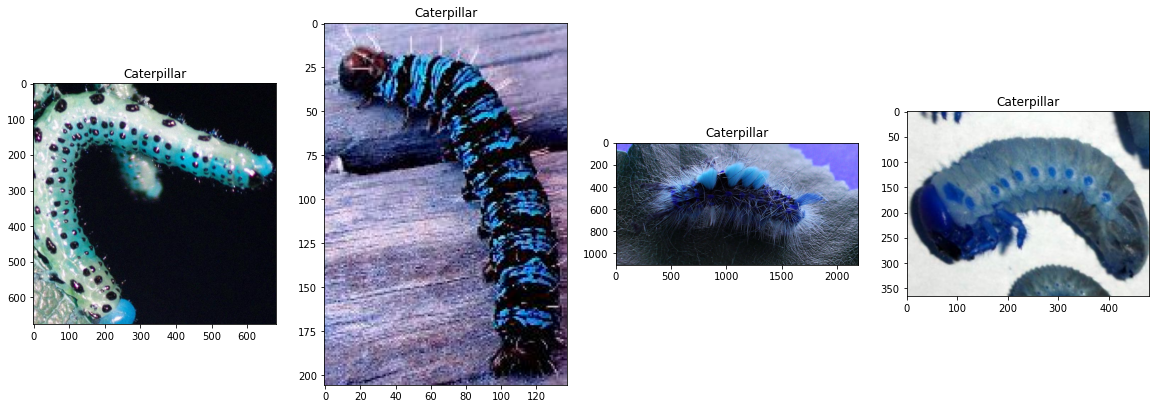

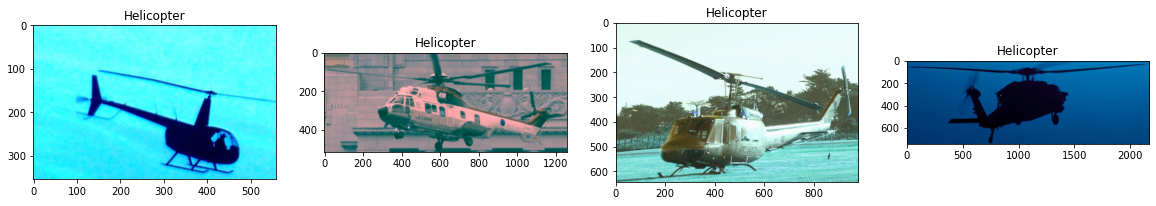

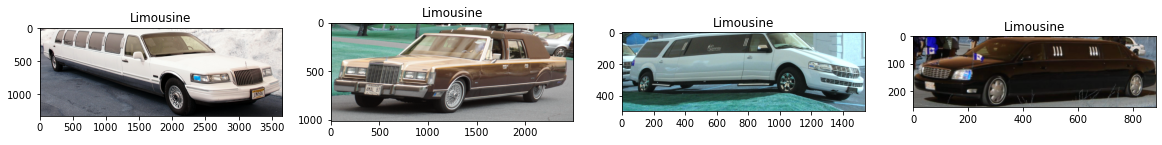

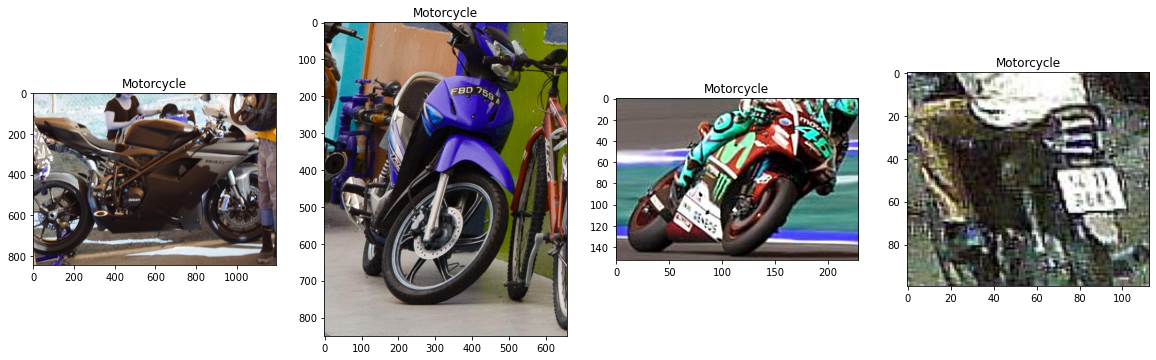

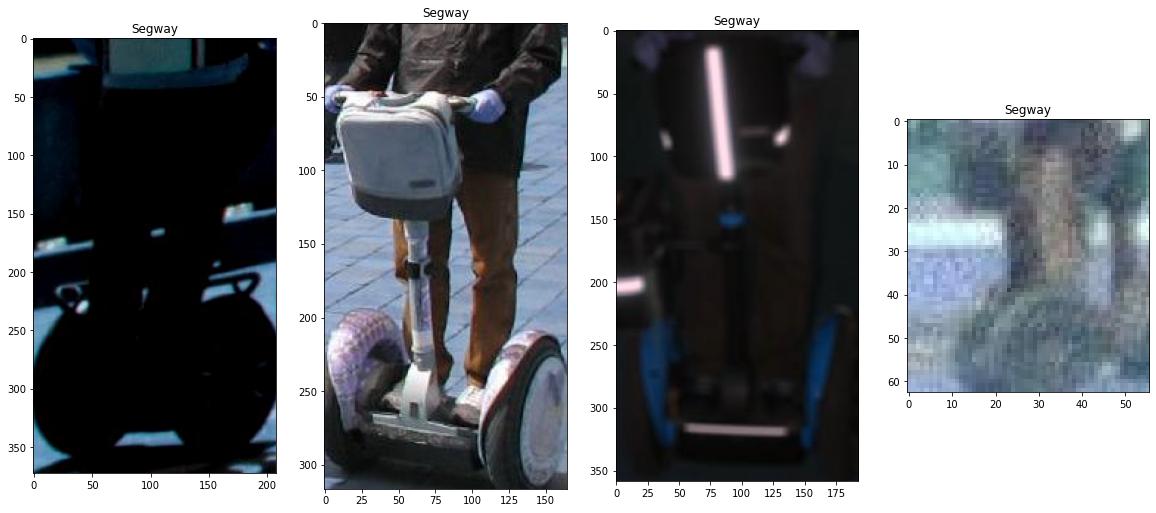

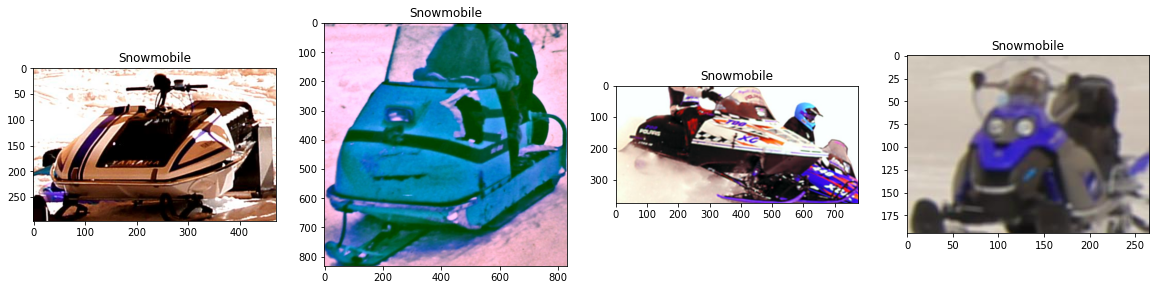

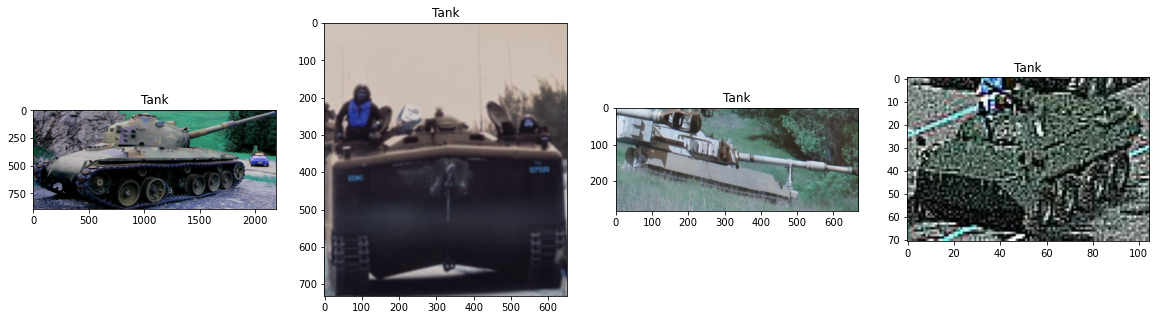

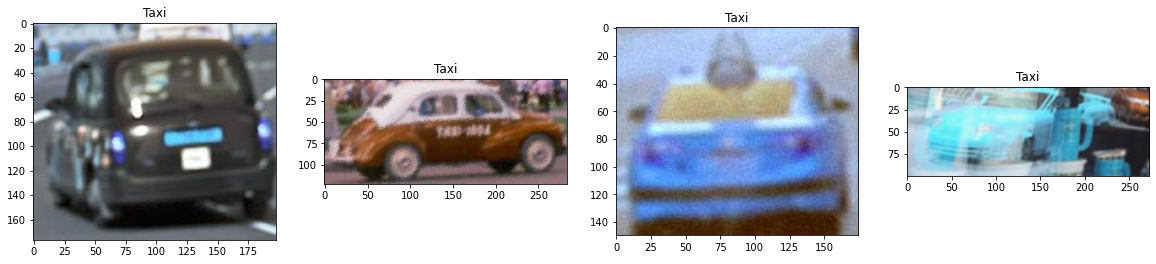

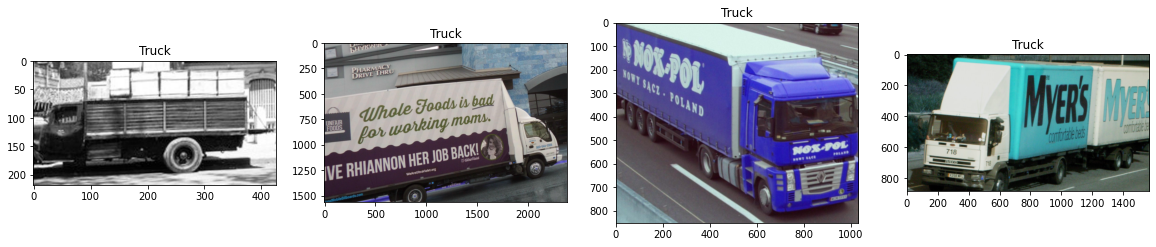

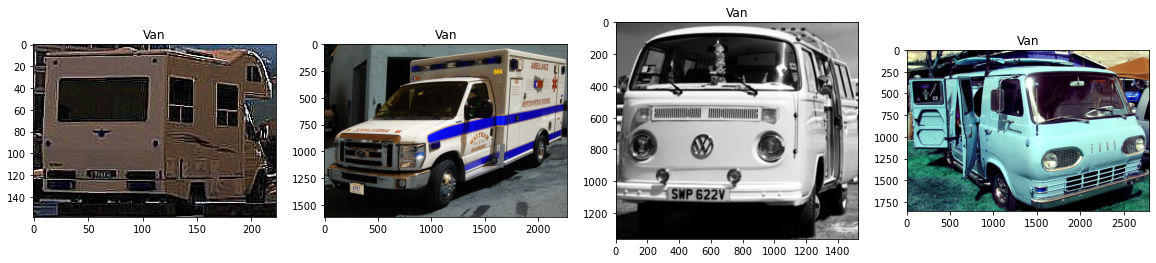

In [8]:
print("="*70)
print("Displaying 4 ranndom image per vehicle class")
print("="*70)

# for every class in `cols`
for j in range(17):
    plt.figure(j)
    plt.figure(figsize=(20,20))
    
    # 4 images per every class
    for i in range(4):
        id = "14{}".format(i+1)
        plt.subplot(int(id))
        random_file = random.choice(os.listdir(BASE + cols[j] + "/"))
        img = cv2.imread(BASE + cols[j] + "/" + random_file)
        plt.title(cols[j])
        plt.imshow(img)
plt.show()

In [9]:
data = []
labels = []
cols = sorted(cols)

# Creating trainable 224x224 images
#                    -------
for vehicle_class in cols:
    print(vehicle_class + " started .....")
    for filename in df[vehicle_class]:
        try:
            # for empty cols
            if filename == None:
                pass
            else:   
                image = cv2.imread("C://Users//jaherran//Projects//Python//BusClassifier//vehicle//train//train//{}/".format(vehicle_class) + filename)
                image_from_numpy_array = Image.fromarray(image, "RGB")
                resized_image = image_from_numpy_array.resize((224, 224))
                data.append(np.array(resized_image))

                if vehicle_class == 'Ambulance':
                    labels.append(0)
                elif vehicle_class == 'Barge':
                    labels.append(1)
                elif vehicle_class == 'Bicycle':
                    labels.append(2)
                elif vehicle_class == 'Boat':
                    labels.append(3)
                elif vehicle_class == 'Bus':
                    labels.append(4)
                elif vehicle_class == 'Car':
                    labels.append(5)
                elif vehicle_class == 'Cart':
                    labels.append(6)
                elif vehicle_class == 'Caterpillar':
                    labels.append(7)
                elif vehicle_class == 'Helicopter':
                    labels.append(8)
                elif vehicle_class == 'Limousine':
                    labels.append(9)
                elif vehicle_class == 'Motorcycle':
                    labels.append(10)
                elif vehicle_class == 'Segway':
                    labels.append(11)
                elif vehicle_class == 'Snowmobile':
                    labels.append(12)
                elif vehicle_class == 'Tank':
                    labels.append(13)
                elif vehicle_class == 'Taxi':
                    labels.append(14)
                elif vehicle_class == 'Truck':
                    labels.append(15)
                elif vehicle_class == 'Van':
                    labels.append(16)
                else:
                    print("Something is wrong.")
                
        except AttributeError:
            print("Attribute error occured for "+filename)

Ambulance started .....
Barge started .....
Bicycle started .....
Boat started .....
Bus started .....
Car started .....
Cart started .....
Caterpillar started .....
Helicopter started .....
Limousine started .....
Motorcycle started .....
Segway started .....
Snowmobile started .....
Tank started .....
Taxi started .....
Truck started .....
Van started .....


In [10]:
vehicle_images_224x224 = np.array(data)
labels_224x224 = np.array(labels)

# save
np.save("all-vehicle-224x224-images-as-arrays", vehicle_images_224x224)
np.save("corresponding-labels-for-all-224x224-images", labels_224x224)

In [11]:
print(vehicle_images_224x224.shape)
print(labels_224x224.shape)
print(np.unique(labels_224x224))

(28045, 224, 224, 3)
(28045,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [12]:
#!rm -r /kaggle/working/data

# Move images to `test` and `train` dir
import shutil
import os


os.mkdir("C://Users//jaherran//Projects//Python//BusClassifier//vehicle//working//data")
os.mkdir("C://Users//jaherran//Projects//Python//BusClassifier//vehicle//working//data/test")
os.mkdir("C://Users//jaherran//Projects//Python//BusClassifier//vehicle//working//data/train")

classes = ['Bicycle', 'Boat', 'Bus', 'Car', 'Motorcycle', 'Truck', 'Van']

for dir in ["test", "train"]:
    for _class in classes:
        os.mkdir("C://Users//jaherran//Projects//Python//BusClassifier//vehicle//working//data//{}//{}".format(dir, _class))

for _class in classes:
    images = os.listdir("C://Users//jaherran//Projects//Python//BusClassifier//vehicle//train//train//{}".format(_class))

    test = images[:300]
    
    # downsample to 1.5k images
    if len(images) < 1500:
      train = images[300:]
    else:
      train = images[300:1500]

    # move images to test-set folder
    for image in test:
        shutil.copy("C://Users//jaherran//Projects//Python//BusClassifier//vehicle//train//train//{}//{}".format(_class, image), "C://Users//jaherran//Projects//Python//BusClassifier//vehicle//working//data//test//{}//{}".format(_class, image))

    # move images to train-set folder
    for image in train:
        shutil.copy("C://Users//jaherran//Projects//Python//BusClassifier//vehicle//train//train//{}//{}".format(_class, image), "C://Users//jaherran//Projects//Python//BusClassifier//vehicle//working//data//train//{}//{}".format(_class, image))

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C://Users//jaherran//Projects//Python//BusClassifier//vehicle//working//data'

# Image classification
It will return the category to which an image belongs. Specifically one array with the probabilities of the input image to belong to each of the categories in which the model was trained.

In [13]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json

In [14]:
input_path = "C://Users//jaherran//Projects//Python//BusClassifier//vehicle//working//data//"

## Image pre-processing

In [15]:
train_datagen = ImageDataGenerator(
    shear_range=10,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    input_path + 'train',
    batch_size=32,
    #class_mode='binary',
    target_size=(224,224))

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

validation_generator = validation_datagen.flow_from_directory(
    input_path + 'test',
    shuffle=False,
    #class_mode='binary',
    target_size=(224,224))

Found 8011 images belonging to 7 classes.
Found 2100 images belonging to 7 classes.


## Transfer learning
Using an existing pre-trained model (called application in Keras). In this case is ResNet50, that has showed great results on image classfication problems.

In [17]:
conv_base = ResNet50(
    include_top=False,
    weights='imagenet')

for layer in conv_base.layers:
    layer.trainable = False

In [79]:
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [18]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
predictions = layers.Dense(7, activation='softmax')(x)
model = Model(conv_base.input, predictions)

In [81]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [19]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [20]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=347 // 32,  # added in Kaggle
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10  # added in Kaggle
                             )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
10/10 [==============================] - 93s 9s/step - loss: 1.5472 - accuracy: 0.5469 - val_loss: 0.5438 - val_accuracy: 0.7750
Epoch 2/30
10/10 [==============================] - 88s 9s/step - loss: 0.6417 - accuracy: 0.7688 - val_loss: 0.7074 - val_accuracy: 0.7500
Epoch 3/30
10/10 [==============================] - 81s 8s/step - loss: 0.5635 - accuracy: 0.7906 - val_loss: 0.0918 - val_accuracy: 0.9625
Epoch 4/30
10/10 [==============================] - 81s 8s/step - loss: 0.5312 - accuracy: 0.7969 - val_loss: 0.7243 - val_accuracy: 0.7344
Epoch 5/30
10/10 [==============================] - 85s 8s/step - loss: 0.4751 - accuracy: 0.8313 - val_loss: 0.1881 - val_accuracy: 0.9281
Epoch 6/30
10/10 [==============================] - 92s 9s/step - loss: 0.5448 - accuracy: 0.8062 - val_loss: 0.2200 - val_accuracy: 0.9219
Epoch 7/30
10/10 [==============================] - 96s 10s/step - loss: 0.4704 - ac

In [77]:
model.save("C://Users//jaherran//Projects//Python//BusClassifier//vehicle//working//models//busModel.h5")
model.save_weights("C://Users//jaherran//Projects//Python//BusClassifier//vehicle//working//models//busModelWeights.h5")

# Serialize model to json
model_json = model.to_json()
with open("C://Users//jaherran//Projects//Python//BusClassifier//vehicle//working//models//busModel.json", "w") as json_file:
    json_file.write(model_json)
    
    
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, "C://Users//jaherran//Projects//Python//BusClassifier//vehicle//working//models2//")




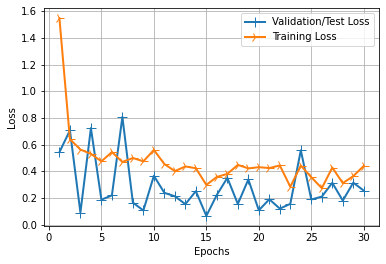

In [32]:
# plot loss chart
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [76]:
from keras.models import load_model
import cv2
import numpy as np
import base64

# model = load_model("C://Users//jaherran//Projects//Python//BusClassifier//vehicle//working//models//busModel.h5")
# optimizer = keras.optimizers.Adam()
# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizer,
#               metrics=['accuracy'])

base_path = "C://Users//jaherran//Projects//Python//BusClassifier//vehicle//working//data//"
input_file = base_path + "validation//003.jpg"

def readb64(base64_string):
    nparr = np.frombuffer(base64.b64decode(base64_string), np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    return img


# Load and encode the image to predict
with open(input_file, "rb") as img:
    encoded_string = base64.b64encode(img.read())
# print(encoded_string)
    
# img = cv2.imread(base_path + "validation//003.jpg")
img = readb64(encoded_string)
img = cv2.resize(img, (224,224))
img_np = np.reshape(img, [1, 224, 224, 3])
# print(img_np) 

cv2.imshow("first image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

pred = model.predict(img_np)



print([ "{:.8f}".format(float(prediction*100)) for prediction in pred[0] ] )

['0.19327305', '83.48262310', '15.54559022', '0.17784979', '0.34521944', '0.20249928', '0.05293632']


In [74]:
classes = ['Bicycle', 'Boat', 'Bus', 'Car', 'Motorcycle', 'Truck', 'Van']
values = ['0.19327305', '83.48262310', '15.54559022', '0.17784979', '0.34521944', '0.20249928', '0.05293632']

[{class_name: value} for class_name, value in zip(classes, values) ]

[{'Bicycle': '0.19327305'},
 {'Boat': '83.48262310'},
 {'Bus': '15.54559022'},
 {'Car': '0.17784979'},
 {'Motorcycle': '0.34521944'},
 {'Truck': '0.20249928'},
 {'Van': '0.05293632'}]

# Object detection
It will detect not just the category present in an image but the location of that object too.